## OLS(ordinary least square)
`statsmodels`

In [3]:
# read data
import pandas as pd
TRD_Index=pd.read_table('part2/017/TRD_Index.txt',sep='\t')
SHindex=TRD_Index[TRD_Index.Indexcd==1]
SZindex=TRD_Index[TRD_Index.Indexcd==399106]
SHRet=SHindex.Retindex
SZRet=SZindex.Retindex
SZRet.index=SHRet.index

import statsmodels.api as sm
# model(Y = a + bX + e) 收益率
model=sm.OLS(SHRet,sm.add_constant(SZRet)).fit()

print(model.summary())

D:\Python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:               Retindex   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     5698.
Date:                Sun, 22 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:53:45   Log-Likelihood:                 4520.3
No. Observations:                1211   AIC:                            -9037.
Df Residuals:                    1209   BIC:                            -9026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.747      0.0

In [4]:
# 拟合值
model.fittedvalues[:5]

0    0.024213
1    0.019940
2   -0.002401
3   -0.015390
4    0.016635
dtype: float64

<function matplotlib.pyplot.show>

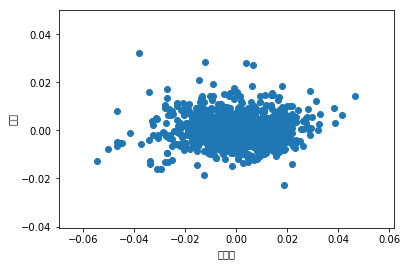

In [8]:
# 回归诊断图
# 线性
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
# plt.
plt.xlabel(u'拟合值')
plt.ylabel(u'残差')
plt.show

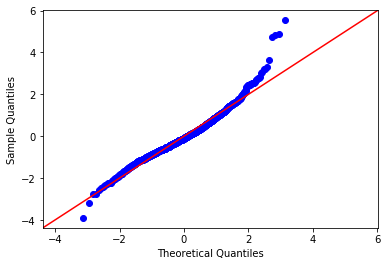

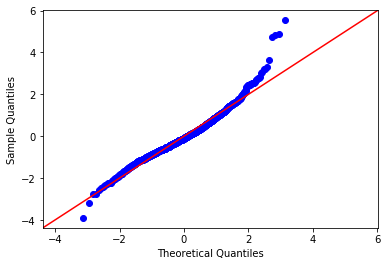

In [9]:
# 正态性
import scipy.stats as stats
sm.qqplot(model.resid_pearson,\
              stats.norm,line='45')

D:\Python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


<function matplotlib.pyplot.show>

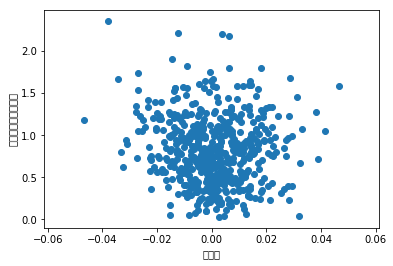

In [10]:
# 同方差性
plt.scatter(model.fittedvalues,\
             model.resid_pearson**0.5)
plt.xlabel('拟合值')
plt.ylabel('标准化残差的平方根')
plt.show

## Multiple Linear Regression Model
多个自变量来解释因变量
CPI --> GDP

In [12]:
penn=pd.read_excel('part2/017/Penn World Table.xlsx', 2)
print(penn.head(3))
import numpy as np
# model 5 factors
model=sm.OLS(np.log(penn.rgdpe),
             sm.add_constant(penn.iloc[:,-6:])).fit()
print(model.summary())


  countrycode country currency_unit  year         rgdpe      pl_c      pl_i  \
0         AGO  Angola        Kwanza  2007  58131.746094  1.253990  0.738191   
1         AGO  Angola        Kwanza  2008  67472.859375  1.418632  0.938361   
2         AGO  Angola        Kwanza  2009  59256.636719  1.681747  0.786687   

       pl_g      pl_x      pl_m      pl_k  
0  1.076301  0.650072  0.764166  0.617699  
1  1.352946  0.774891  0.937404  0.777646  
2  1.105007  0.829843  1.190549  0.657191  
                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     56.69
Date:                Sun, 22 Apr 2018   Prob (F-statistic):           9.81e-59
Time:                        11:34:27   Log-Likelihood:                -1670.2
No. Observations:                

In [13]:
# 自变量之间共线性
penn.iloc[:,-6:].corr()

# 剔除pl_c pl_k

,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
pl_c,1.000000,0.718931,0.636698,0.078841,0.213328,0.553757
pl_i,0.718931,1.000000,0.259183,0.072019,0.139333,0.779306
pl_g,0.636698,0.259183,1.000000,0.130729,0.256069,0.211259
pl_x,0.078841,0.072019,0.130729,1.000000,0.477304,-0.065623
pl_m,0.213328,0.139333,0.256069,0.477304,1.000000,0.000531
pl_k,0.553757,0.779306,0.211259,-0.065623,0.000531,1.000000


In [14]:
# 剔除相关变量
model=sm.OLS(np.log(penn.rgdpe),\
             sm.add_constant(penn.iloc[:,-5:-1])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     84.00
Date:                Sun, 22 Apr 2018   Prob (F-statistic):           6.58e-60
Time:                        11:40:59   Log-Likelihood:                -1672.0
No. Observations:                 835   AIC:                             3354.
Df Residuals:                     830   BIC:                             3378.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3558      0.502     16.631      0.0